<a href="https://colab.research.google.com/github/vitoriamoniqueresende/Intelig-ncia-Artificial-FIAP/blob/main/Aula_5_Opencv_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Disciplina: IAC
### Professor: André Tritiack
### Turma: 3ECR
### 2023

In [1]:
# Importando o Opencv
import cv2

In [2]:
# Importando a imagem de exemplo
imagem = cv2.imread('people1.jpg')

In [3]:
# Dimensões da imagem
imagem.shape

(1280, 1920, 3)

In [4]:
# Importando o pacote imshow do Opencv para o Google Colab
from google.colab.patches import cv2_imshow

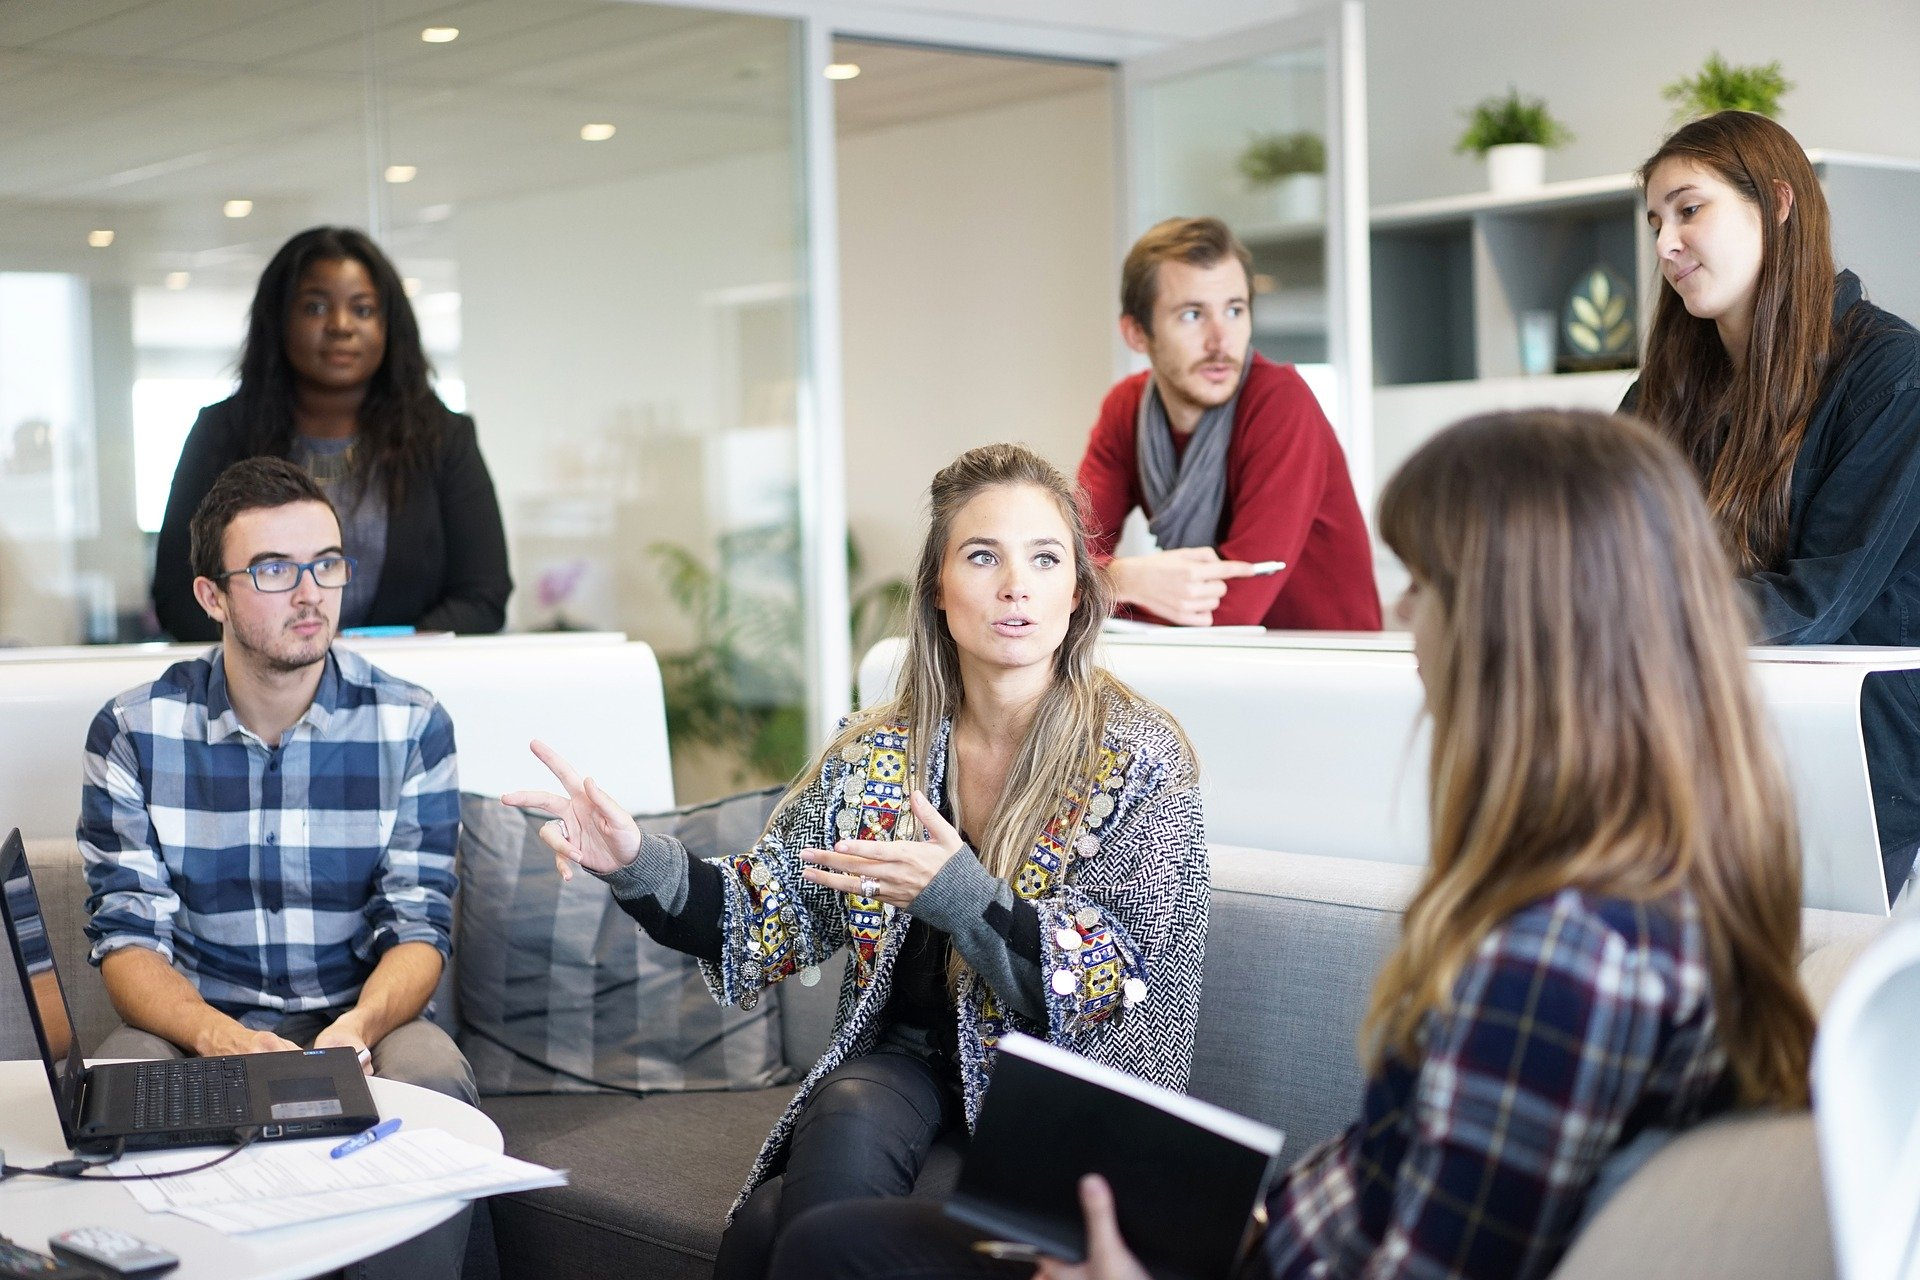

In [5]:
# Visualizando a imagem direto pelo Opencv
cv2_imshow(imagem)

In [6]:
# Redimensionando a imagem
imagem = cv2.resize(imagem, (800, 600))
imagem.shape

(600, 800, 3)

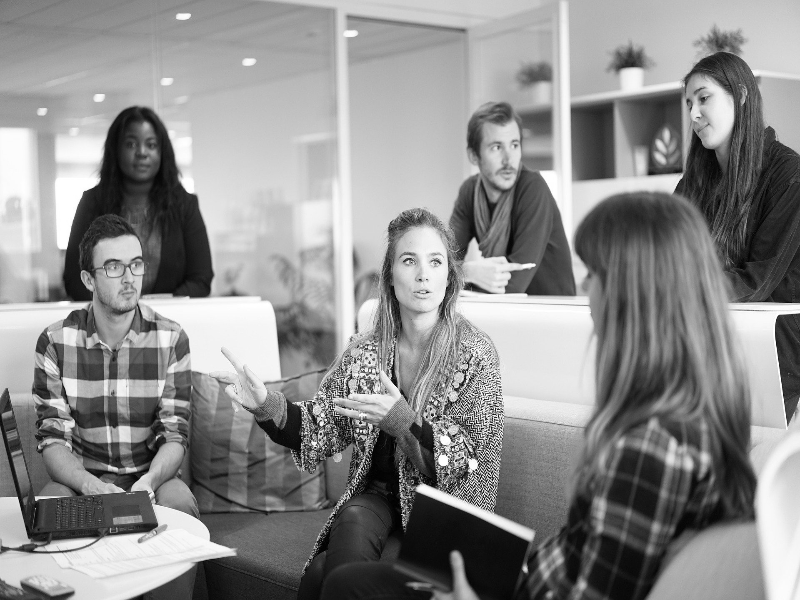

In [7]:
# Convertendo em escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [8]:
# Verificando novamente as dimensões:
imagem_cinza.shape

(600, 800)

In [9]:
print('Dimensões iniciais: ', 600*800*3)
print('Dimensões finais: ', 600*800)

Dimensões iniciais:  1440000
Dimensões finais:  480000


In [10]:
# Importando o modelo pré-treinado do classificador Haarcascade
detector_facial = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [11]:
# Executando a função de detecção de faces
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

In [12]:
deteccoes

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

In [13]:
# As duas primeiras colunas referem-se às coordenadas de início e fim da face encontrada.
# As duas últimas referem-se ao tamanho da face encontrada.

In [14]:
len(deteccoes)

6

In [15]:
# Percorrendo as coordenadas da variável "deteccoes":
# Sendo:
# x: start point
# y: end point
# w: largura
# h: altura 
for x, y, w, h in deteccoes:
  print(x, y, w, h)

677 72 68 68
115 124 53 53
475 123 59 59
387 233 73 73
92 239 66 66
390 323 56 56


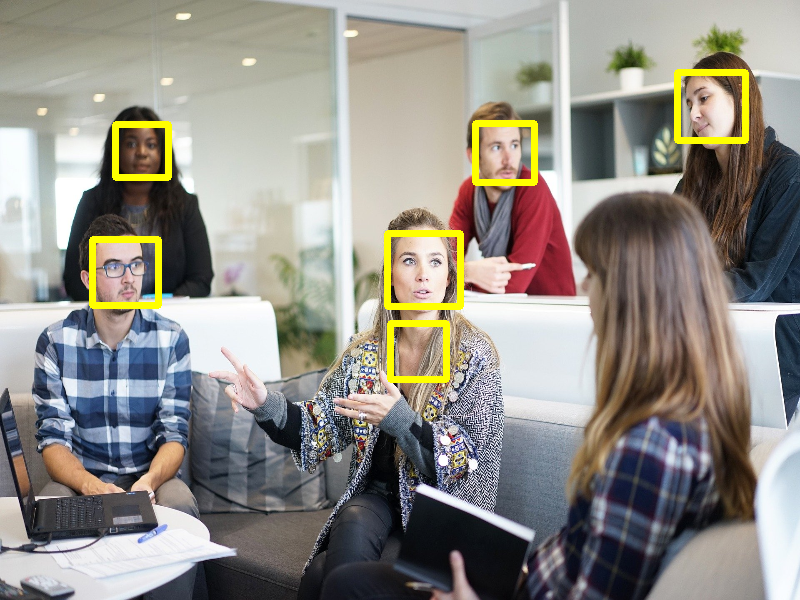

In [16]:
# Criando um retângulo com cv2.rectangle(imagem, coordenada inicial, coordenado final, espessura do traço)
for x, y, w, h in deteccoes:
  #print(x, y, w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,255), 5)
cv2_imshow(imagem)

#### Ajustando o parâmetro Scale Factor.

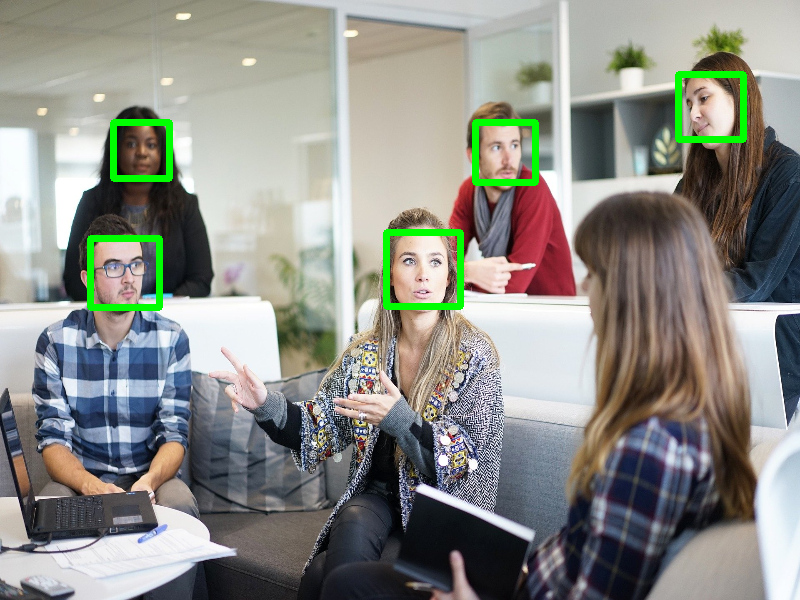

In [17]:
# Valor mínimo do parâmetro scale factor: 1.00
imagem = cv2.imread('people1.jpg')
imagem = cv2.resize(imagem, (800, 600))
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.09)
for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(imagem)

In [18]:
# Ajustando outros parâmetros:
# minNeighbors: mínimo de vizinhos detectados considerados faces.
# minSize: tamanho mínimo da face.
# maxSize: tamanho máximo da face.

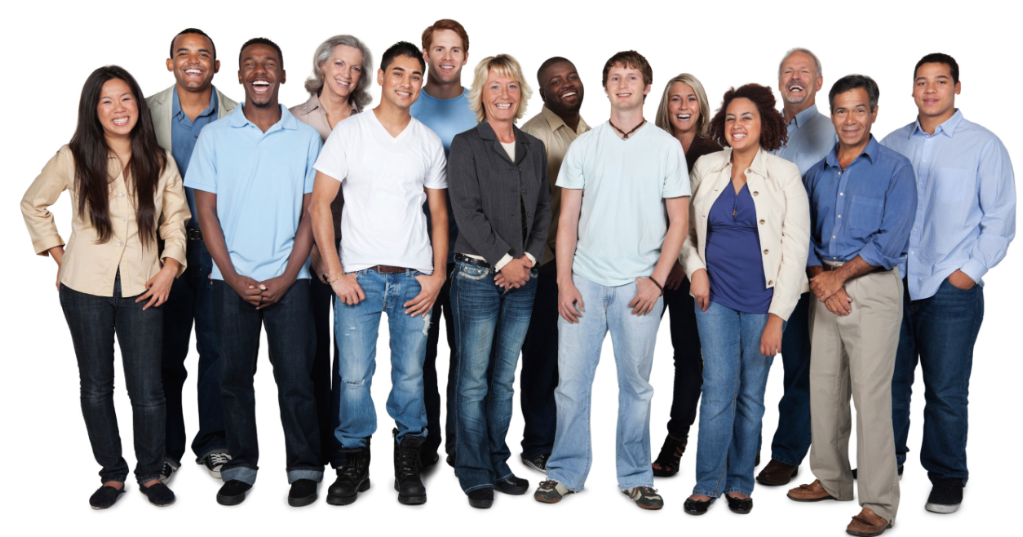

In [19]:
imagem = cv2.imread('people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.9, minNeighbors=7, minSize=(10,10), maxSize=(100,100))
for (x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(imagem)